In [2]:
"""
环境需求：
import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
"""

"\n环境需求：\nimport nltk\nimport numpy as np\nimport pandas as pd\nimport matplotlib.pyplot as plt\nimport seaborn as sns\nimport warnings\nwarnings.filterwarnings('ignore')\n"

# 数据下载 

In [3]:
! pip install -q kaggle

import json
token = {"username":"crownsss","key":"1a9398b0f5266dda733f318786e96b8d"}
with open('/content/kaggle.json', 'w') as file:
  json.dump(token, file)

!mkdir -p ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d uciml/sms-spam-collection-dataset #(数据下载API)
! unzip sms-spam-collection-dataset.zip -d spam

  0% 0.00/211k [00:00<?, ?B/s]
100% 211k/211k [00:00<00:00, 82.3MB/s]
Archive:  sms-spam-collection-dataset.zip
  inflating: spam/spam.csv           


In [4]:
import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 加载数据

In [5]:
df = pd.read_csv('/content/spam/spam.csv',encoding='latin-1')#这里encoding需要指定为latin-1

In [6]:
# 查看一下数据基本
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


概述及包含一组带有标记的短信数据，其中：
- v1表示短信标签，ham表示正常信息，spam表示垃圾信息
- v2是短信的内容

# 数据预处理 

In [7]:
#去除不需要的列
df=df.iloc[:,:2]

In [8]:
#重命名列
df=df.rename(columns={"v1":"label","v2":"message"})
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
# 将lable进行one-hot编码，其中0:ham，1:spam
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [10]:
df['label']=encoder.fit_transform(df['label'])
df['label'].value_counts()

0    4825
1     747
Name: label, dtype: int64

可以看出一共有747个垃圾短信

In [11]:
# 查看缺失值
df.isnull().sum()
# 数据没有缺失值

label      0
message    0
dtype: int64

# 探索性数据分析（EDA） 
通过可视化分析来更好的理解数据

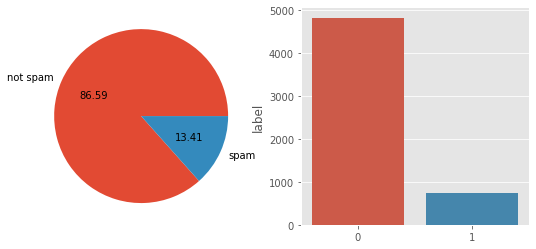

In [12]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.figure(figsize=(9,4))
plt.subplot(1,2,1)
plt.pie(df['label'].value_counts(),labels=['not spam','spam'],autopct="%0.2f")
plt.subplot(1,2,2)
sns.barplot(x=df['label'].value_counts().index,y=df['label'].value_counts(),data=df)
plt.show()

# 特征工程
在特征工程部分，我简单创建了一些单独的特征来提取信息
- 字符数
- 单词数
- 句子数

In [13]:
#1.字符数
df['char']=df['message'].apply(len)

In [15]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [16]:
#2.单词数,这里我们首先要对其进行分词处理，使用nltk
#分词处理
df['words']=df['message'].apply(lambda x: len(nltk.word_tokenize(x)))

In [17]:
# 3.句子数
df['sen']=df['message'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [18]:
df.head()

,label,message,char,words,sen
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [19]:
# 描述性统计
df.describe()

,label,char,words,sen
count,5572.000000,5572.000000,5572.000000,5572.000000
mean,0.134063,80.118808,18.695621,1.970747
std,0.340751,59.690841,13.742587,1.417778
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,61.000000,15.000000,1.000000
75%,0.000000,121.000000,27.000000,2.000000
max,1.000000,910.000000,220.000000,28.000000


In [20]:
# 正常短信
df[df['label']==0].describe()

,label,char,words,sen
count,4825.0,4825.000000,4825.000000,4825.000000
mean,0.0,71.023627,17.271917,1.808705
std,0.0,58.016023,13.988885,1.328227
min,0.0,2.000000,1.000000,1.000000
25%,0.0,33.000000,8.000000,1.000000
50%,0.0,52.000000,13.000000,1.000000
75%,0.0,92.000000,22.000000,2.000000
max,0.0,910.000000,220.000000,28.000000


In [21]:
# 垃圾短信
df[df['label']==1].describe()

,label,char,words,sen
count,747.0,747.000000,747.000000,747.000000
mean,1.0,138.866131,27.891566,3.017403
std,0.0,29.183082,6.867007,1.528449
min,1.0,13.000000,2.000000,1.000000
25%,1.0,132.500000,25.000000,2.000000
50%,1.0,149.000000,29.000000,3.000000
75%,1.0,157.000000,32.000000,4.000000
max,1.0,224.000000,46.000000,8.000000


下面我们通过可视化比较一下不同短信在这些数字特征上的分布情况

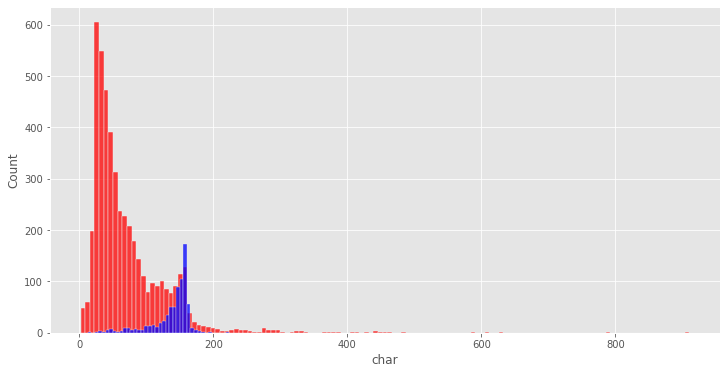

In [22]:
# 字符数比较
plt.figure(figsize=(12,6))
sns.histplot(df[df['label']==0]['char'],color='red')#正常短信
sns.histplot(df[df['label']==1]['char'],color = 'blue')#垃圾短信

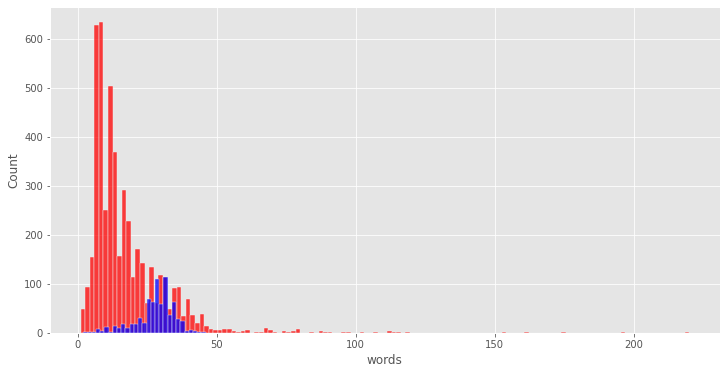

In [23]:
# 比较
plt.figure(figsize=(12,6))
sns.histplot(df[df['label']==0]['words'],color='red')#正常短信
sns.histplot(df[df['label']==1]['words'],color = 'blue')#垃圾短信

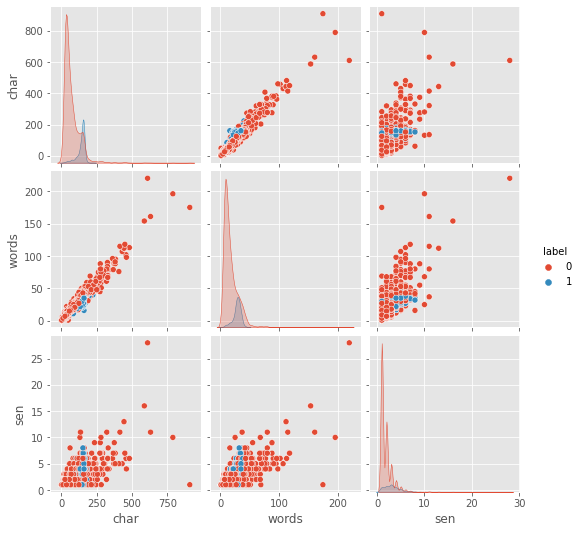

In [24]:
sns.pairplot(df,hue='label')

In [25]:
#删除数据集中存在的一些异常值
i=df[df['char']>500].index
df.drop(i,axis=0,inplace=True)

In [26]:
df=df.reset_index()
df.drop("index",inplace=True,axis=1)

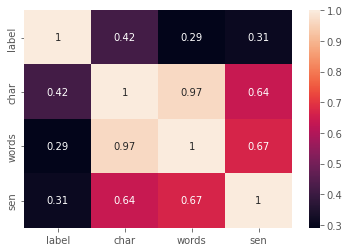

In [27]:
#相关系数矩阵
sns.heatmap(df.corr(),annot=True)

我们这里看到存在多重共线性，因此，我们不使用所有的列，在这里选择与label相关性最强的char

# 数据预处理
对于英文文本数据，我们常用的数据预处理方式如下
- 去除标点符号
- 去除停用词
- 去除专有名词
- 变换成小写
- 分词处理
- 词根、词缀处理
下面我们来看看如何实现这些步骤

In [28]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [29]:
# 首先导入需要使用到的包
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from wordcloud import WordCloud
import string,time

In [30]:
# 标点符号
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [31]:
# 停用词
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

清洗文本数据：
- 去除web连接
- 去除邮件
- 取掉数字

In [32]:
def remove_website_links(text):
    no_website_links = text.replace(r"http\S+", "")#去除网络连接
    return no_website_links

def remove_numbers(text):
    removed_numbers = text.replace(r'\d+','')#去除数字
    return removed_numbers

def remove_emails(text):
    no_emails = text.replace(r"\S*@\S*\s?",'')#去除邮件
    return no_emails

In [33]:
df['message'] = df['message'].apply(remove_website_links)
df['message'] = df['message'].apply(remove_numbers)
df['message'] = df['message'].apply(remove_emails)

In [34]:
df.head()

,label,message,char,words,sen
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [41]:
def message_transform(text):
  
  text = text.lower()#转换为小写
  
  text = nltk.word_tokenize(text)#分词处理
  
  # 去除停用词和标点
  y = []#创建一个空列表
  for word in text:
    stopwords_punc = stopwords.words('english')+list(string.punctuation)#存放停用词和标点
    if word.isalnum()==True and word not in stopwords_punc:
      y.append(word)
  
  # 词根变换
  message=y[:]
  y.clear()
  for i in message:
    ps=PorterStemmer()
    y.append(ps.stem(i))
  return " ".join(y)#返回字符串形式

In [49]:
df['message'] = df['message'].apply(message_transform)
df['num_words_transform']=df['message'].apply(lambda x: len(str(x).split()))

In [50]:
df.head()

,label,message,char,words,sen,num_words_transform
0,0,go jurong point crazi avail bugi n great world...,111,24,2,16
1,0,ok lar joke wif u oni,29,8,2,6
2,1,free entri 2 wkli comp win fa cup final tkt 21...,155,37,2,24
3,0,u dun say earli hor u c alreadi say,49,13,1,9
4,0,nah think goe usf live around though,61,15,1,7


现在我们集中分析message和label两列

# 词云

In [51]:
#绘制信息中出现最多的词的词云
from wordcloud import WordCloud
#首先，创建一个object
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [52]:
# 垃圾信息的词云
spam_wc=wc.generate(df[df['label']==1]['message'].str.cat(sep=""))

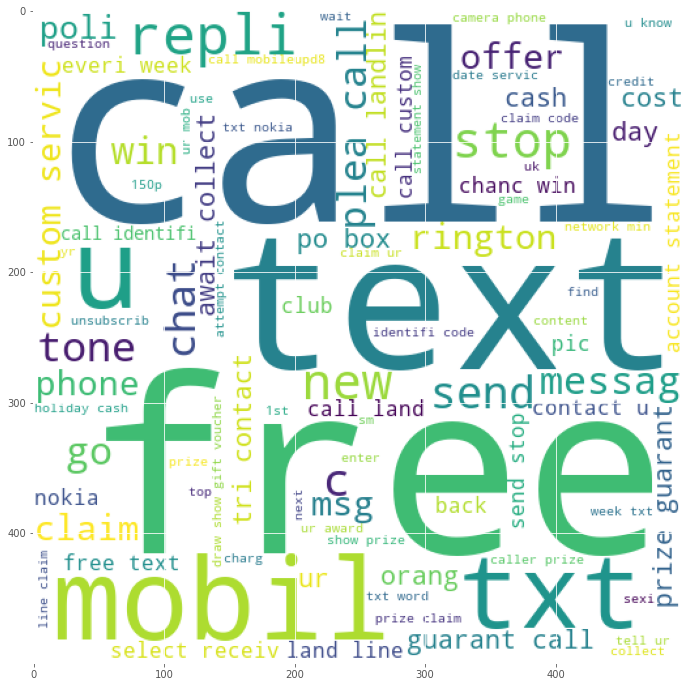

In [53]:
plt.figure(figsize=(18,12))
plt.imshow(spam_wc)

可以看出，这些垃圾邮件出现频次最多的单词是：**free、call**等这种具有诱导性的信息

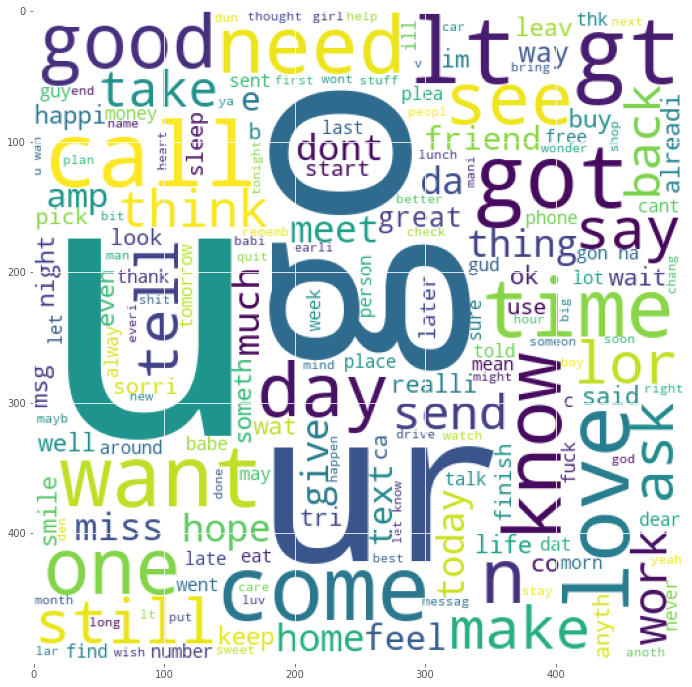

In [55]:
# 正常信息的词云
ham_wc = wc.generate(df[df['label']==0]['message'].str.cat(sep=''))
plt.figure(figsize=(18,12))
plt.imshow(ham_wc)

可以看出正常信息出现频次较多的单词为u、go、got、want等一些传达信息的单词

为了简化词云图的信息，我们现在分别统计垃圾短信和正常短信频次top30的单词


In [60]:
# 统计
spam_corpus=[]
for i in df[df['label']==1]['message'].tolist():
  for word in i.split():
        spam_corpus.append(word)


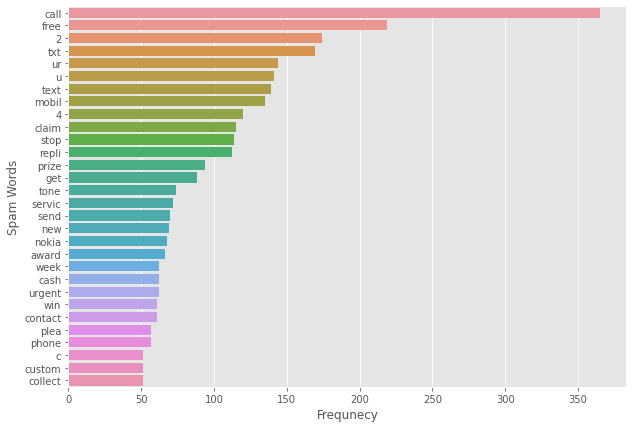

In [67]:
from collections import Counter
from collections import Counter
Counter(spam_corpus)#记数
Counter(spam_corpus).most_common(30)#取最多的30个单词
plt.figure(figsize=(10,7))
sns.barplot(y=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],x=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks()
plt.xlabel("Frequnecy")
plt.ylabel("Spam Words")
plt.show()

## Ham words

In [68]:
ham_corpus=[]
for i in df[df['label']==0]['message'].tolist():
  for word in i.split():
    ham_corpus.append(word)

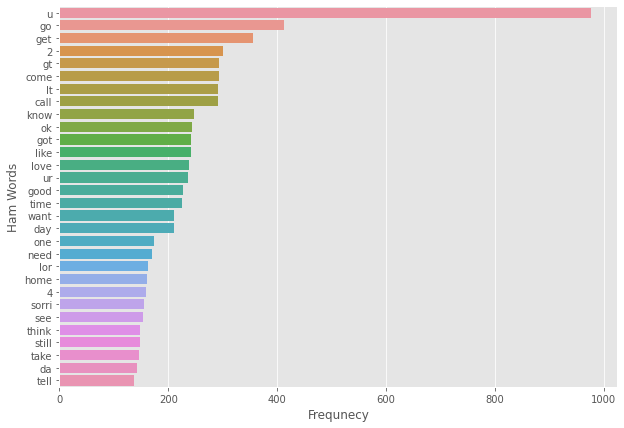

In [69]:
from collections import Counter
plt.figure(figsize=(10,7))
sns.barplot(y=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],x=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks()
plt.xlabel("Frequnecy")
plt.ylabel("Ham Words")
plt.show()

# 使用朴素贝叶斯构建模型
根据历史经验，在文本数据上朴素贝叶斯算法效果很好，因此我们将使用它，但在此过程中还将它与不同的算法进行比较。
在统计学中，朴素贝叶斯分类器是一系列简单的“概率分类器”，它们基于应用贝叶斯定理和特征之间的（朴素）条件独立假设。它们是最简单的贝叶斯网络模型之一，但与核密度估计相结合，它们可以达到更高的准确度水平。


首先，我们这里的输入数据是文本数据，不能够直接建立模型。因此，我们必须将这些文本数据进行特征提取。比较常用的几种方法：
- 词袋模型（Bag of words）存在稀疏性问题
- TF-IDF
- Word2vec

因为是实战训练，在这里不具体展开的几种方法的原理，在这里我选择TF-IDF。我也试了一下Word embedding，结合一些深度学习的方法，精度能够有所提高，感兴趣的小伙伴可以自己尝试一下，基本步骤类似

In [70]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)

In [85]:
X = tfidf.fit_transform(df['message']).toarray()
y = df['label'].values

array([0, 0, 1, ..., 0, 0, 0])

In [87]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)#训练集测试集划分


In [88]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score


这里我们比较三种不同的贝叶斯模型的各个评估指标结果

In [111]:
#GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print("Accuracy Score -",accuracy_score(y_test,y_pred1))
print("Precision Score -",precision_score(y_test,y_pred1))
print('f1_socre -',f1_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))

Accuracy Score - 0.8456014362657092
Precision Score - 0.47038327526132406
f1_socre - 0.6108597285067873
[[807 152]
 [ 20 135]]


In [112]:
#MultinomialNB
mnb = MultinomialNB()
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print("Accuracy Score -",accuracy_score(y_test,y_pred2))
print("Precision Score -",precision_score(y_test,y_pred2))
print('f1_socre -',f1_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))

Accuracy Score - 0.9793536804308797
Precision Score - 0.9925373134328358
f1_socre - 0.9204152249134948
[[958   1]
 [ 22 133]]


In [108]:
#Bernuli
bnb = BernoulliNB()
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print("Accuracy Score -",accuracy_score(y_test,y_pred3))
print("Precision Score -",precision_score(y_test,y_pred3))
print('f1_socre -',f1_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))

Accuracy Score - 0.9829443447037702
Precision Score - 1.0
f1-socre - 0.9347079037800687
[[959   0]
 [ 19 136]]


下面我们继续比较其他几种常见的分类模型的效果


In [107]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import precision_score, recall_score, plot_confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn.model_selection import cross_val_score

In [113]:
classifiers={"svc":SVC(kernel='sigmoid', gamma=1.0),
            "knc": KNeighborsClassifier(),
             "bnb" : BernoulliNB(),
             "dtc" : DecisionTreeClassifier(max_depth=5),
             "lr" : LogisticRegression(solver='liblinear', penalty='l1'),
             "rfc" : RandomForestClassifier(n_estimators=50, random_state=2),
             "adb" : AdaBoostClassifier(n_estimators=50, random_state=2),
             "xgb" : XGBClassifier(n_estimators=50,random_state=2),
             "gbc" : GradientBoostingClassifier(n_estimators=50,random_state=2)
            }

In [115]:
# 训练分类器
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    f1 = f1_score(X_train,y_train)
    
    return accuracy,precision,f1

In [118]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    train_accuracy = clf.score(X_train,y_train)
    
    return accuracy,precision,train_accuracy

In [119]:
accuracy_scores = []
precision_scores = []
train_accuracy_score=[]

for name,clf in classifiers.items():
    
    current_accuracy,current_precision,current_train_score = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    train_accuracy_score.append(current_train_score)
    print()

For  svc
Accuracy -  0.9802513464991023
Precision -  0.9784172661870504

For  knc
Accuracy -  0.9093357271095153
Precision -  1.0

For  bnb
Accuracy -  0.9829443447037702
Precision -  1.0

For  dtc
Accuracy -  0.9299820466786356
Precision -  0.8811881188118812

For  lr
Accuracy -  0.9622980251346499
Precision -  0.959349593495935

For  rfc
Accuracy -  0.9721723518850988
Precision -  0.9920634920634921

For  adb
Accuracy -  0.966786355475763
Precision -  0.9338235294117647

For  xgb
Accuracy -  0.9443447037701975
Precision -  0.9514563106796117

For  gbc
Accuracy -  0.9542190305206463
Precision -  0.9642857142857143



In [123]:
df1=pd.DataFrame({'Algorithm':classifiers.keys(),'Precision':precision_scores,
                  'Test Accuracy':accuracy_scores}).round(3)

In [124]:
df1

,Algorithm,Precision,Test Accuracy
0,svc,0.978,0.980
1,knc,1.000,0.909
2,bnb,1.000,0.983
3,dtc,0.881,0.930
4,lr,0.959,0.962
5,rfc,0.992,0.972
6,adb,0.934,0.967
7,xgb,0.951,0.944
8,gbc,0.964,0.954


In [125]:
df2=df1.sort_values(['Precision','Test Accuracy'],ascending=False)
df2

,Algorithm,Precision,Test Accuracy
2,bnb,1.000,0.983
1,knc,1.000,0.909
5,rfc,0.992,0.972
0,svc,0.978,0.980
8,gbc,0.964,0.954
4,lr,0.959,0.962
7,xgb,0.951,0.944
6,adb,0.934,0.967
3,dtc,0.881,0.930


通过对比，选择BNB模型，模型的precision为100%，accuracy为98.3%

# 模型部署

In [128]:
import pickle
pickle.dump(tfidf,open('/content/drive/MyDrive/数据科学项目/vectorizer.pkl','wb'))
pickle.dump(mnb,open('/content/drive/MyDrive/数据科学项目/model.pkl','wb'))

In [129]:
!pip install streamlit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.1 MB 13.1 MB/s 
     |████████████████████████████████| 235 kB 69.2 MB/s 
     |████████████████████████████████| 4.3 MB 50.2 MB/s 
     |████████████████████████████████| 164 kB 69.1 MB/s 
     |████████████████████████████████| 181 kB 67.9 MB/s 
     |████████████████████████████████| 78 kB 7.4 MB/s 
     |████████████████████████████████| 63 kB 1.8 MB/s 
     |████████████████████████████████| 1.6 MB 51.0 MB/s 
     |████████████████████████████████| 51 kB 5.4 MB/s 
  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19582 sha256=21a3d85be17918f464a3cd2a6218e014a024d0b32b62f0a17325f7b35e67a0a6
  Stored in directory: /root/.cache/pip/wheels/5f/55/ab/36a76989f7f88d9ca7b1f68da6d94252bb6a8d6ad4f18e04e9
Successfully built validators


In [132]:
import os
path="/content/drive/MyDrive/数据科学项目"
os.chdir(path)
os.listdir(path)

['1.health.ipynb',
 '2.fake detection',
 'vectorizer.pkl',
 'model.pkl',
 'app.py',
 '.ipynb_checkpoints']

In [133]:
!python app.py

2022-08-23 14:30:50.699 INFO    numexpr.utils: NumExpr defaulting to 2 threads.
2022-08-23 14:30:53.221 
  command:

    streamlit run app.py [ARGUMENTS]


In [137]:
!streamlit run app.py

2022-08-23 14:32:34.402 INFO    numexpr.utils: NumExpr defaulting to 2 threads.

  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:8501
  External URL: http://34.147.20.53:8501

  Stopping...
  Stopping...
Traceback (most recent call last):
  File "/usr/local/bin/streamlit", line 8, in <module>
    sys.exit(main())
  File "/usr/local/lib/python3.7/dist-packages/click/core.py", line 829, in __call__
    return self.main(*args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/click/core.py", line 782, in main
    rv = self.invoke(ctx)
  File "/usr/local/lib/python3.7/dist-packages/click/core.py", line 1259, in invoke
    return _process_result(sub_ctx.command.invoke(sub_ctx))
  File "/usr/local/lib/python3.7/dist-packages/click/core.py", line 1066, in invoke
    return ctx.invoke(self.callback, **ctx.params)
  File "/usr/local/lib/python3.7/dist-packages/click/core.py", line 610, in invoke
    return callback(*args, **kwargs)
  File "/usr/lo